In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
# Step 1: Load the dataset
data = pd.read_csv('/content/sample_data/parkinsons_updrs.csv')

# Step 2: Data Exploration
print("Dataset Shape:", data.shape)
print("Column Names:\n", data.columns)
print("Missing Values:\n", data.isnull().sum())
print("Dataset Overview:\n", data.describe())

Dataset Shape: (5875, 22)
Column Names:
 Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')
Missing Values:
 subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64
Dataset Overview:
           subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.80

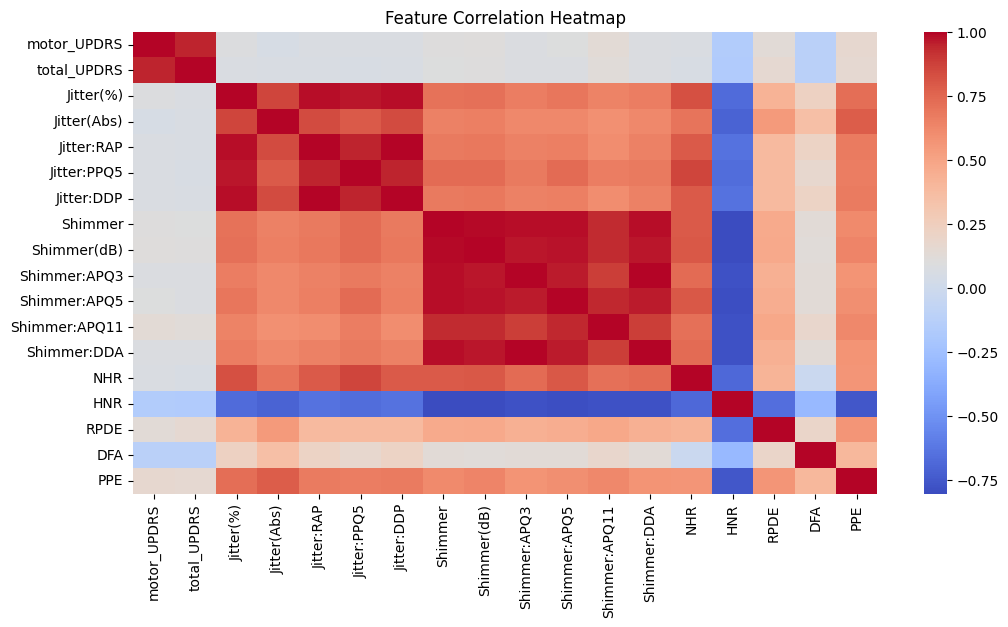

In [33]:
#heatmap

#  Drop irrelevant columns
# Exclude 'subject#' and 'test_time' as they are not predictive features
data = data.drop(columns=["subject#", "test_time","age","sex"])

# Step 3: Compute the correlation matrix
correlation_matrix = data.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [34]:
import pandas as pd


# Step 2: Inspect column names
print("Original column names:")
print(data.columns)

# Step 3: Clean column names (remove extra spaces)
data.columns = data.columns.str.strip()

# Verify cleaned column names
print("\nCleaned column names:")
print(data.columns)

# Step 4: Drop irrelevant columns
# Drop 'subject#' (identifier) and 'test_time' (not predictive)
data = data.drop(columns=["subject#", "test_time", "age","sex"], errors="ignore")

# Step 5: Define Features and Target
target = 'total_UPDRS'  # Change to 'motor_UPDRS' if needed
X = data.drop(columns=[target, "motor_UPDRS"])  # Exclude both target variables
y = data[target]

# Step 6: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shapes of the datasets
print("\nX_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Original column names:
Index(['motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE'],
      dtype='object')

Cleaned column names:
Index(['motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE'],
      dtype='object')

X_train_scaled shape: (4700, 16)
X_test_scaled shape: (1175, 16)
y_train shape: (4700,)
y_test shape: (1175,)


In [35]:
# Define a function to calculate custom accuracy
def calculate_custom_accuracy(y_true, y_pred, threshold):
    """
    Calculate the percentage of predictions within a specified threshold.

    Parameters:
        y_true (array): True target values.
        y_pred (array): Predicted target values.
        threshold (float): Acceptable error margin.

    Returns:
        float: Percentage of predictions within the threshold.
    """
    absolute_errors = np.abs(y_true - y_pred)
    within_threshold = np.sum(absolute_errors <= threshold)
    return (within_threshold / len(y_true)) * 100

# Step 6: Train Multiple ML Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100),
    "Support Vector Machine": SVR(kernel='rbf'),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Step 7: Model Training and Evaluation
results = {}
predictions = {}

# Define the threshold for custom accuracy (e.g., 5% of the target range)
target_range = np.max(y_train) - np.min(y_train)
threshold = 0.05 * target_range  # 5% of the target range

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    custom_accuracy = calculate_custom_accuracy(y_test, y_pred, threshold)

    # Store results and predictions
    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2, "Custom Accuracy (%)": custom_accuracy}
    predictions[name] = y_pred

    # Print performance metrics
    print(f"{name} Performance:")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}, Custom Accuracy: {custom_accuracy:.2f}%\n")

Linear Regression Performance:
MAE: 8.2956, RMSE: 10.0966, R² Score: 0.0801, Custom Accuracy: 14.38%

Random Forest Performance:
MAE: 6.5313, RMSE: 8.4560, R² Score: 0.3547, Custom Accuracy: 26.04%

XGBoost Performance:
MAE: 6.9129, RMSE: 8.8929, R² Score: 0.2863, Custom Accuracy: 24.34%

Support Vector Machine Performance:
MAE: 7.5212, RMSE: 9.7005, R² Score: 0.1508, Custom Accuracy: 22.21%

Neural Network Performance:
MAE: 6.9166, RMSE: 8.6531, R² Score: 0.3243, Custom Accuracy: 21.87%



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
# Step 8: Results Summary
results_df = pd.DataFrame(results).T
print("\nFinal Model Comparison:")
print(results_df)


Final Model Comparison:
                             MAE       RMSE  R² Score  Custom Accuracy (%)
Linear Regression       8.295591  10.096644  0.080052            14.382979
Random Forest           6.531260   8.455989  0.354735            26.042553
XGBoost                 6.912889   8.892859  0.286339            24.340426
Support Vector Machine  7.521216   9.700467  0.150830            22.212766
Neural Network          6.916552   8.653085  0.324304            21.872340


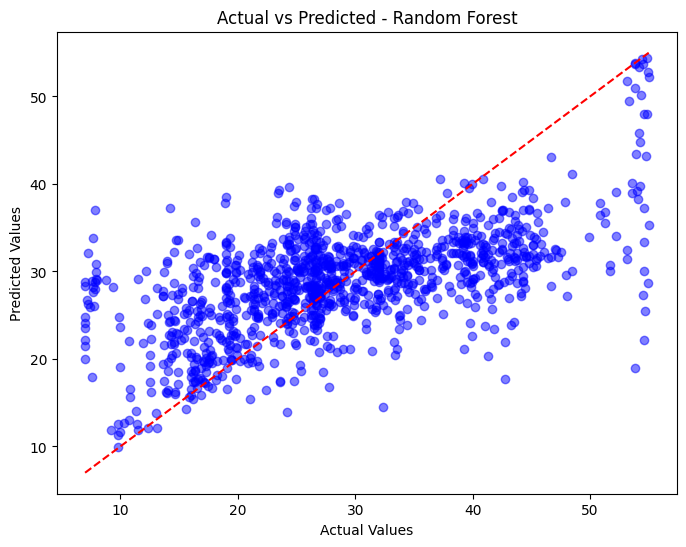

Best performing model: Random Forest


In [37]:
# Step 9: Identify Best Model
best_model_name = results_df['R² Score'].idxmax()
best_model_pred = predictions[best_model_name]

# Step 10: Plot Actual vs Predicted for Best Model
plt.figure(figsize=(8,6))
plt.scatter(y_test, best_model_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.show()

print(f"Best performing model: {best_model_name}")


In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Step 11: Hyperparameter Tuning
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    print("Best Parameters for Random Forest:", grid_search.best_params_)

elif best_model_name == "XGBoost":
    param_dist = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 10]
    }
    random_search = RandomizedSearchCV(XGBRegressor(objective='reg:squarederror'), param_dist, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
    random_search.fit(X_train_scaled, y_train)
    best_model = random_search.best_estimator_
    print("Best Parameters for XGBoost:", random_search.best_params_)

# Retrain the best model with optimized parameters
best_model.fit(X_train_scaled, y_train)
y_best_pred = best_model.predict(X_test_scaled)
final_r2 = r2_score(y_test, y_best_pred)
print(f"Final R² Score after Hyperparameter Tuning: {final_r2:.4f}")


Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Final R² Score after Hyperparameter Tuning: 0.3603


<ipython-input-40-2622cbdf4165>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


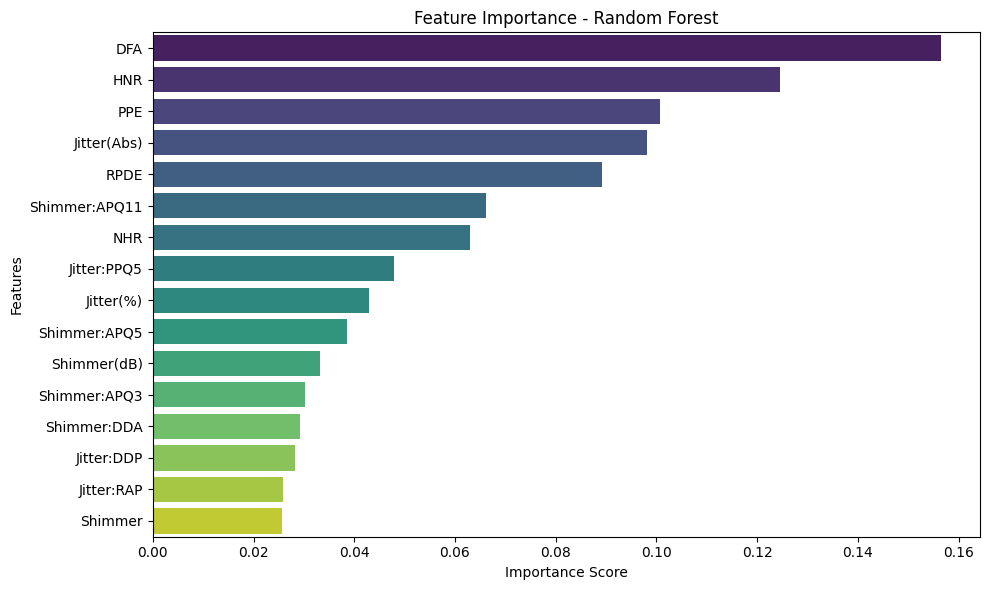

<ipython-input-40-2622cbdf4165>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


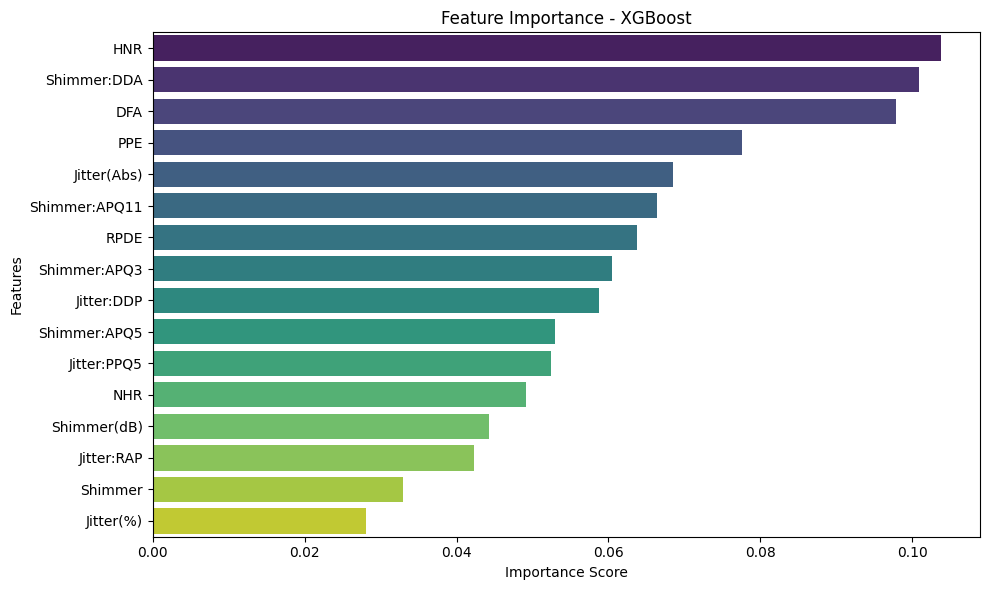

Random Forest MAE: 5.17
XGBoost MAE: 5.45


In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Step 2: Preprocess the data
# Drop unnecessary columns like 'subject#' and 'test_time'
data = data.drop(columns=["subject#", "test_time","age","sex"], errors="ignore")

# Separate features (X) and target variables (y)
X = data.drop(columns=["motor_UPDRS", "total_UPDRS"])  # Features
y_motor = data["motor_UPDRS"]  # Target variable for motor UPDRS
y_total = data["total_UPDRS"]  # Target variable for total UPDRS

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preserve the feature names after scaling
feature_names = X.columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_motor, test_size=0.2, random_state=42
)

# Step 3: Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Train an XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Step 5: Feature Importance Analysis
def plot_feature_importance(model, feature_names, model_name):
    """
    Plot feature importance for a given model.
    """
    # Get feature importances
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):  # For linear models
        importances = np.abs(model.coef_)
    else:
        raise ValueError(f"Feature importance not available for {model_name}.")

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

# Step 6: Visualize feature importance for both models
plot_feature_importance(rf_model, feature_names, "Random Forest")
plot_feature_importance(xgb_model, feature_names, "XGBoost")

# Step 7: Evaluate model performance
# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.2f}")

# Predictions for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb:.2f}")